

## 参考资料

- Hansen B E . 2021. **Econometrics**. Princeton University Press. [Data and Contents](https://www.ssc.wisc.edu/~bhansen/econometrics/), [PDF](https://www.ssc.wisc.edu/~bhansen/econometrics/Econometrics.pdf), chap 2-5 &#x1F34E; 
- Rubinstein, Y. 2016, Slides, [The Regression Tool](https://yonarubinstein.files.wordpress.com/2016/07/the-regression-tool1.pdf)
  - Chapter 2, Linear Models for Continuous Data, [PDF](https://data.princeton.edu/wws509/notes/c2.pdf), PDF 讲义
- James, G., D. Witten, T. Hastie, R. Tibshirani. **An introduction to statistical learning**: with Applications in Python (ISLP)[M]. Springer, **2023**, [website](https://www.statlearning.com/), [Resources](https://www.statlearning.com/resources-python), [github](https://github.com/intro-stat-learning/ISLP_labs), [-PDF-](https://bayanbox.ir/view/1060725898744657072/An-Introduction-to-Statistical-Learning-with-Applications-in-Python.pdf)
  - [ISLP documentation](https://intro-stat-learning.github.io/ISLP/)：书中数据文件的详细说明
  - [各章 Python 实操部分](https://intro-stat-learning.github.io/ISLP/labs/Ch02-statlearn-lab.html)
  - [github-Notebooks](https://github.com/ogulcancicek/An-Introduction-to-Statistical-Learning-Python)&emsp; |&emsp; [Excercises and Solultions](https://github.com/hardikkamboj/An-Introduction-to-Statistical-Learning)
- Stewart, B., 2020. Simple Linear Regression, [Slides](https://scholar.princeton.edu/sites/default/files/bstewart/files/lecture5_handout2020.pdf)
- Causal Inference for The Brave and True, [-Link-](https://matheusfacure.github.io/python-causality-handbook), 从因果推断的角度进行解释，尤其是控制变量的选


## 简介：计量模型的设定思路

![w:900](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221209091907.png)

>**核心思想**

- 从 $y$ 的分布特征入手
- 确定分析的重点：均值，中位数，还是尾部、波动率、取值区间？
- 设定 $y = f(x, \beta)$ 的函数形式
  - 变量筛选
  - 模型筛选
- 统计推断：**Population** &rarr; **Sample**
  - 估计参数 $\beta$ &rarr; 假设检验
- 应用：解释 / 因果推断 / 预测 / 可视化


::: {.callout-Prompt}
模拟一份数据，Python 代码。代码尽可能简洁：
1. N = 11 
2. x - 收入, 取值范围 5-15w；
3. y-消费：蓝色组 y~4 + 0.4x  ；红色组 y~6+ 0.6x，两个组的 x 取值大概有 30% 左右的重叠区域
4. y ~ x 的整体关系看起来有点非线性的特征，但蓝色组和红色组组内基本上线性关系
5. 我随后会用这份数据演示模型设定的思想：可以做全样本线型模型；子样本线型模型，也可以采用 regression tree ，或者非参数估计
:::

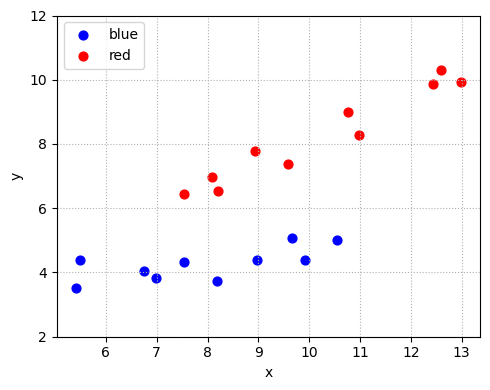

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

# 样本容量
N = 20

# 分组索引：前一半为蓝色组，后一半为红色组
group = np.array(["blue"] * (N // 2) + ["red"] * (N - N // 2))

# 收入 x（单位：万元），两个组略有重叠
x_blue = np.linspace(5, 10, N // 2) + np.random.normal(0, 1, N // 2)
x_red = np.linspace(8, 14, N - N // 2) + np.random.normal(0, 1, N - N // 2)
x = np.concatenate([x_blue, x_red])

# 消费 y：
y = np.where(group == "blue",
             2 + 0.3*x + np.random.normal(0, 0.5, N),
             1 + 0.7*x + np.random.normal(0, 0.5, N))

# 打包为 DataFrame，便于建模
df = pd.DataFrame({"x": x, "y": y, "group": group})

# 画散点图
colors = {"blue": "blue", "red": "red"}
plt.figure(figsize=(5, 4))
for g in df["group"].unique():
    sub = df[df["group"] == g]
    plt.scatter(sub["x"], sub["y"], color=colors[g], label=g, s=40)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(2, 12)
plt.legend(loc="upper left")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


::: {.callout-prompt}
(Round 1) 画图：
基于蓝色组样本绘制一条水平线，y = mean(y)|蓝色，x 取值范围: (x_min, x_max)|蓝色；
红色组按相同方式处理；
另外，附加散点图

(Round 2) 修改代码：
采用更简洁的方式编写如下代码，现在的版本太繁琐了。
另外，legend 只需保留两个组的均值即可
:::

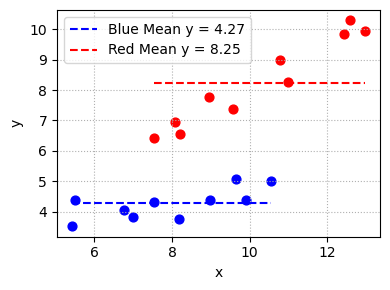

In [79]:
import matplotlib.pyplot as plt

# 分组计算均值和横轴范围
grouped = df.groupby("group")
means = grouped["y"].mean()
x_ranges = grouped["x"].agg(["min", "max"])

# 绘图
plt.figure(figsize=(4, 3))
for g, color in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=color, s=40)
    plt.hlines(means[g], x_ranges.loc[g, "min"], x_ranges.loc[g, "max"],
               colors=color, linestyles="--", label=f"{g.capitalize()} Mean y = {means[g]:.2f}")

# 美化
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


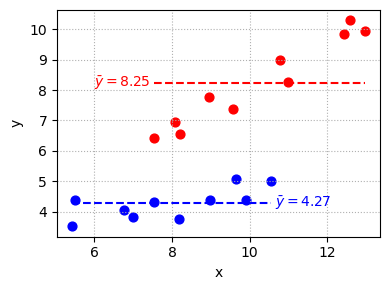

In [82]:
import matplotlib.pyplot as plt

# 分组计算均值和横轴范围
grouped = df.groupby("group")
means = grouped["y"].mean()
x_ranges = grouped["x"].agg(["min", "max"])

# 绘图
plt.figure(figsize=(4, 3))
for g, color in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=color, s=40)
    # 水平线
    y_mean = means[g]
    x_start, x_end = x_ranges.loc[g]
    plt.hlines(y_mean, x_start, x_end, colors=color, linestyles="--")
    # 标注均值
    if g == "red":
        plt.text(x_start - 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='right')
    else:  # blue
        plt.text(x_end + 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='left')

# 美化
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


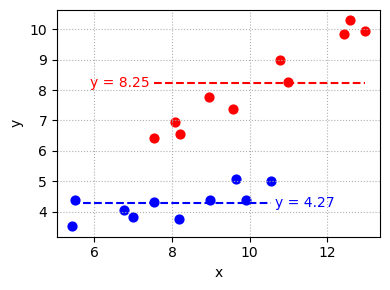

In [75]:
import matplotlib.pyplot as plt

grouped = df.groupby("group")
means = grouped["y"].mean()
x_min, x_max = grouped["x"].min(), grouped["x"].max()

plt.figure(figsize=(4, 3))
for g, c in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=c, s=40)
    plt.hlines(means[g], x_min[g], x_max[g], colors=c, linestyles="--")
    x_text = x_max[g] + 0.1 if g == "blue" else x_min[g] - 0.1
    ha = "left" if g == "blue" else "right"
    plt.text(x_text, means[g], f"y = {means[g]:.2f}", color=c, va="center", ha=ha)

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


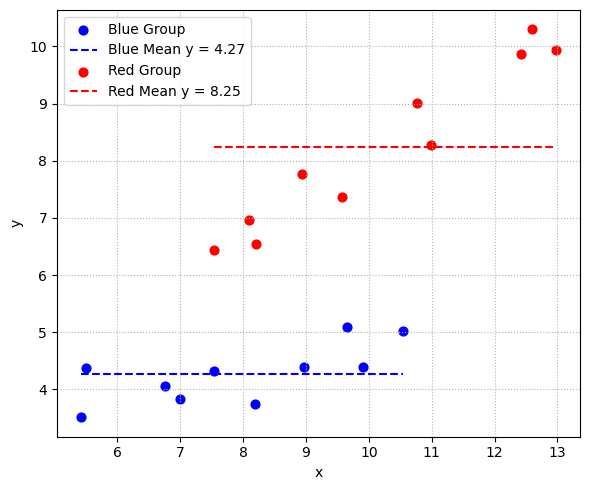

In [68]:
# 计算蓝色组和红色组的 y 均值
mean_y_blue = df[df['group'] == 'blue']['y'].mean()
mean_y_red = df[df['group'] == 'red']['y'].mean()

# 获取蓝色组和红色组的 x 范围
x_min_blue, x_max_blue = df[df['group'] == 'blue']['x'].min(), df[df['group'] == 'blue']['x'].max()
x_min_red, x_max_red = df[df['group'] == 'red']['x'].min(), df[df['group'] == 'red']['x'].max()

# 绘制散点图和水平线
plt.figure(figsize=(6, 5))

# 蓝色组
plt.scatter(df[df['group'] == 'blue']['x'], df[df['group'] == 'blue']['y'], color=colors['blue'], label='Blue Group', s=40)
plt.hlines(mean_y_blue, x_min_blue, x_max_blue, colors=colors['blue'], linestyles='--', label=f'Blue Mean y = {mean_y_blue:.2f}')

# 红色组
plt.scatter(df[df['group'] == 'red']['x'], df[df['group'] == 'red']['y'], color=colors['red'], label='Red Group', s=40)
plt.hlines(mean_y_red, x_min_red, x_max_red, colors=colors['red'], linestyles='--', label=f'Red Mean y = {mean_y_red:.2f}')

# 图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

group
blue     7.95
red     10.21
Name: x, dtype: float64


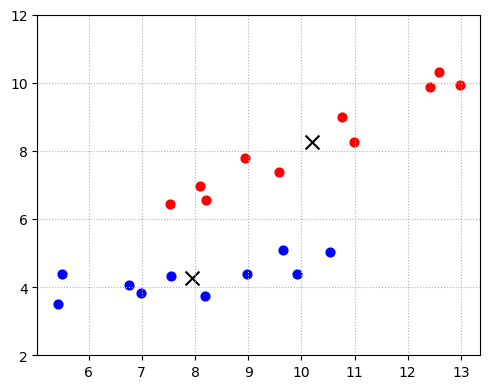

In [67]:
# 样本均值
mean_x = df.groupby("group")["x"].mean()
print(mean_x.round(2))

# 图示 + 散点
plt.figure(figsize=(5, 4))
for g in df["group"].unique():
    sub = df[df["group"] == g]
    plt.scatter(sub["x"], sub["y"], color=colors[g], label=g, s=40)
    plt.scatter(mean_x[g], df[df["group"] == g]["y"].mean(), color="black", marker="x", s=100)

plt.ylim(2, 12)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 1. 线性模型与 OLS 估计

- 模型设定
- 条件期望
- OLS 估计




## 1.1 条件期望函数 (CEF)

> Mroz, T. A., **1987**, The sensitivity of an empirical model of married women's hours of work to economic and statistical assumptions, **Econometrica**, 55 (4): 765-799. [-Link-](https://doi.org/10.2307/1911029), [-PDF-](https://sci-hub.ren/10.2307/1911029), [PDF2](https://juanmuro.web.uah.es/mroz87.pdf)


![w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/%E5%9B%BE%E7%89%872_20191213104808.png)



![bg left:50% w:670](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_01_scatter.png)


>条件期望 CEF
$$
\mathbb{E}[Y| X=x]=m(x)
$$
- eg. $\mathbb{E}[Wage| Educ=12]=m(12)$
  - `sum wage if educ==12` 
  - `reg wage if educ==12`
>建模思路：考虑误差

$$
\begin{aligned}
Y &=m(X)+e \\
\mathbb{E}[e| X] &=0 \\
\mathbb{E}\left[e^{2}|X\right] &=\sigma^{2}(X)
\end{aligned}
$$

>实证模型
$$
\mathbb{E}[Wage\,|\,Edu]= m(Edu)
$$





![bg left:50% w:670](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_02_lfit_qfit.png)

>实证模型
$$
\mathbb{E}[Wage\,|\,Edu]= m(Edu)
$$

>模型设定：

$
(1)\ \  Wage_i = \alpha + \beta Edu_i + e_i
$

$
(2)\ \ Wage_i = \alpha + \beta_1 Edu_i + {\color{red}{\beta_2 Edu_i^2}} + e_i
$

$
(3)\ \ {\color{red}{\text{ln}}}(Wage_i) = \alpha + \beta Edu_i + e_i
$

$
(4)\ \ Wage_i = \alpha + \beta Edu_i + {\color{red}{\gamma D + \theta D\!\times\!Edu_i}} + e_i
$
&emsp;&emsp;  其中，$D = \mathbf{1}(Edu\!>\!16)$

:dog: 切记，上述模型分析的都是 **条件期望** (CEF)。

:cat: 扩展：条件概率、条件中位数、条件分位数

<!--  


### CEF 和 线性回归

Regression estimates provide a valuable baseline for almost all empirical research because regression is tightly linked to the CEF, a natural summary of empirical relationships.
Three reasons why vector of population regression coefficients of interest:
(1) The Linear CEF Theorem: If the CEF is linear, the population regression function is it. (limited empirical relevance, special cases only)
(2) The Best Linear Predictor Theorem: The function $X_{i}^{\prime} \beta$ is the best linear predictor of $Y$ given $X$, in a MMSE sense.
(3) The Regression CEF Theorem: The function $X_{i}^{\prime} \beta$ provides the MMSE linear approximation to $E\left[Y_{i} \mid X_{i}\right]$
- Angrist and Pischkes tavourıte way to motivate regression, to extent distribution of Y focus of interest (rather than individual prediction).




## replication
> Fan, Y., J. Yi, J. Zhang, **2021**, Rising intergenerational income persistence in china, **American Economic Journal: Economic Policy**, 13 (1): 202-230. [-Link-](https://doi.org/10.1257/pol.20170097), [-PDF-](https://sci-hub.ren/10.1257/pol.20170097), [PDF2](https://www.aeaweb.org/doi/10.1257/pol.20170097.appx), [Replication](https://doi.org/10.3886/E110861V1)

- $ln(y)$，工资弹性估计
- 交乘项、固定效应

This paper documents an increasing intergenerational income persistence in China since economic reforms were introduced in 1979 . The intergenerational income elasticity increases from $0.390$ for the 1970-1980 birth cohort to $0.442$ for the 1981-1988 birth cohort; this increase is more evident among urban and coastal residents than rural and inland residents. We also explore how changes in intergenerational income persistence is correlated with market reforms, economic development, and policy changes.




> Goldberg, J., **2016**, Kwacha gonna do? Experimental evidence about labor supply in rural malawi, **American Economic Journal: Applied Economics**, 8 (1): 129-149. [-Link-](https://doi.org/10.1257/app.20130369), [-PDF-](https://sci-hub.ren/10.1257/app.20130369), [Replication](http://doi.org/10.3886/E116331V1)

I use a field experiment to estimate the wage elasticity of employment in the day labor market in rural Malawi. Once a week for 12 consecutive weeks, I make job offers for a workfare-type program to 529 adults. The daily wage varies from the tenth to the ninetieth percentile of the wage distribution, and individuals are entitled to work a maximum of one day per week. In this context (the low agricultural season), 74 percent of individuals worked at the lowest wage, and consequently the estimated labor supply elasticity is low (0.15), regardless of observable characteristics.



- 重点参考：
  - Hastie - 2021 书配套 Slides, Linear Regression. [-Link-](https://hastie.su.domains/lectures.htm), [-PDF-](https://hastie.su.domains/MOOC-Slides/linear_regression.pdf) 
- [Wartoon - 很全面](https://finance.wharton.upenn.edu/~mrrobert/resources/Teaching/CorpFinPhD/Linear-Regression-Slides.pdf)
- [MIT - 稳健性检验-GLM-Lasso 简介](https://www.mit.edu/~6.s085/notes/lecture4.pdf)
- [听清楚](https://github.com/skranz/empecon/blob/main/slides/pdf_handout/ee_3.pdf)




## Learn how to run and read regression
- Mechanics: how to estimate the intercept and slope?
- Properties: when are these good estimates?
- Uncertainty: how will the OLS estimator behave in repeated samples?
- Testing: can we assess the plausibility of no relationship $\left(\beta_{1}=0\right)$ ?
- Interpretation: how do we interpret our estimates?

-->

<!-- 

## Regression as a prediction algorithm
- Denote by $\mathbf{X}$ the design matrix. This is the matrix on which we will project $\mathbf{y}$.
- In other words we have an input matrix $\mathbf{X}$ with dimensions $n \times p$ and an output vector $\mathbf{y}$ with dimensions $n \times 1$.
$$
\mathbf{X}=\left(\begin{array}{cccc}
X_{11} & X_{12} & \ldots & X_{1 p} \\
X_{21} & X_{22} & \ldots & X_{2 p} \\
\vdots & \vdots & \vdots & \vdots \\
X_{n 1} & X_{n 2} & \ldots & X_{n p}
\end{array}\right)_{n \times p}
$$
- The $X_{j i}$ denotes the value of characteristic $j$ for individual $i$. -->


### 矩阵表示 
- **Example** 假设我们收集到了两个解释变量的数据: `education` 和 `age`，则 $X$ 矩阵定义为：
$$
\mathbf{X}=\left(\begin{array}{cccc}
1 & \text { education }_{1} & \text { age }_{1} & \text { age }_{p}^{2} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text { education }_{n} & \text { age }_{n} & \text { age }_{n}^{2}
\end{array}\right)_{n \times 4}
$$

- 模型写法：
  $$
  \mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{e}
  $$





## 1.2 线性回归模型：假设条件

<br>

> $y_{i}=x_{i}^{\prime} \beta+e_{i}, \quad i=1, \ldots, n$ 
&emsp; &emsp; $x_{i}$ 和 $\beta$ 均为 $k \times 1$ 维；&emsp; 参数个数为： $K=k+1$ &ensp;$\left(\beta\right.$ and $\left.\sigma^{2}\right)$



  - **A1： 参数线性假设。**
  
    - $y = a+ x\beta_1 + z\beta_2 + ({\color{red}{x\times z}})\theta + u$
    - $y = a+ x\beta_1 + {\color{red}{z^{\beta_2}}} + u$ &emsp; NLS：[**[R]** `nl`](https://www.stata.com/manuals/rnl.pdf) 
  - **A2： 随机抽样假设。**
    - 否则，便会存在自选择 ([`etregress`](https://www.stata.com/manuals/teetregress.pdf)) 或样本选择偏误 ([`heckman`](https://www.stata.com/manuals/rheckman.pdf))  
  - **A3：外生性假设。** $\mathbb{E}\left(e_{i} \mid x_{i}\right)=0 \ \Longrightarrow \ \mathbb{E}\left(e_{i}\right)=0$ 
  - **A4：同方差假设。** $\mathbb{E}\left(e_{i}^{2}\right)=\sigma^{2}$



## 1.3 最小二乘法

- 模型设定：&emsp; &emsp; $\qquad y_{i} = \alpha + x_{i} \beta + e_{i}$

- 最小化残差平方和 (**RSS**)：
$$RSS(\beta)=\sum_{i=1}^{N}\left(y_{i}-\alpha - x_{i} \beta\right)^{2}$$

- 估计值：
$$\widehat{\alpha} = E(y\,|\, x=0) = \bar{y}\,|\, x=0$$

$$\widehat{\beta} = \frac{\sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

&emsp; &emsp; 其中，$\bar{x}$ 和 $\bar{y}$ 分别是 $x$ 和 $y$ 的样本均值。
- 拟合值: $\qquad \widehat{y}_{i} = \hat{\alpha} + x_{i} \hat{\beta}$
- 残差：$\quad\quad\,\,\widehat{e}_i = y_i -\widehat{y}_i$ 

![bg right:55% w:600](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_sum_of_squares.png)



### 矩阵表示 
- 模型设定：
$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{e}$$

- 残差平方和：
$$
R S S(\beta)=(\mathbf{y}-\mathbf{X} \beta)^{\prime}(\mathbf{y}-\mathbf{x} \beta)


$$
- 对 $\beta$ 求一阶偏导数:
$$
\frac{\partial \mathrm{RSS}}{\partial \beta}=-2 \mathbf{X}^{\prime}(\mathbf{y}-\mathbf{X} \beta) = 0
$$

- 求解得到 $\beta$ :
$$
\widehat{\beta}=\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1} \mathbf{X}^{\prime} \mathbf{y}
$$

- 残差向量：
$$\widehat{\mathbf{e}} = \mathbf{y} - \mathbf{X}\widehat{\mathbf{\beta}}$$




## 1.4 拟合值和残差

<br>

![bg right:70% w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221230115142.png)


> **Stata dofile**:   
> [点击查看](https://gitee.com/arlionn/PX/wikis/SlidesDofiles/A4_OLS_R1_reg_Fig2_v2.md) 





### 拟合值和残差 - 实现

<br>

![bg right:50% w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_03_lfit.png)

```stata
. webuse "mroz.dta", clear

. reg wage educ  

. predict wage_hat    // 拟合值
. predict e_hat       // 残差

. scatterfit wage educ  // 散点+拟合线


. regfit  // 拟合方程

  wage = -2.74 + 0.52*educ
         (0.62) (0.05)
  N = 421, R2 = 0.22, adj-R2 = 0.21
```



### 残差方差估计 $\hat{\sigma}^2$
$$\qquad y_{i} = \alpha + x_{i} \beta + e_{i}$$

<br>

$$
\hat{\sigma}^2 = \frac{RSS}{n - k}
$$

  $$
  RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \hat{e}_i^2
  $$
- $y_i$ 是观察值，$\hat{y}_i$ 是拟合值，$\hat{e}_i$ 是残差。
- **$n$** 是样本量，**$k$** 是回归模型中的参数个数 (包括截距项)。

#### 为什么除以 $n - k$？

模型拟合了 $k$ 个参数（包括截距项），因此自由度减去 $k$，以避免过度拟合。此时，残差方差 $\hat{\sigma}^2$ 是对总体残差方差的无偏估计。

```stata
webuse "mroz.dta", clear
eststo m1: reg lwage educ
eststo m2: reg lwage educ exper 

esttab m1 m2, scalar(N r2 rss) nogap 
```

![bg right:38% w:450](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250107092536.png)




## 1.5 二元线性回归的可视化解释

![bg right:40% w:500](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_superPlanent_01.png)

> Source: [Hastie-2021](https://hastie.su.domains/MOOC-Slides/linear_regression.pdf)，[3D-vedio](https://www.youtube.com/watch?v=JaMgi4XBjo8)

二元线性回归中，用两个自变量 $X_1$ 和 $X_2$ 来预测因变量 $Y$：

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon \quad (1)
$$

<!-- - $\beta_0$ 是截距，表示当 $X_1$ 和 $X_2$ 都为 0 时的预测值。
- $\beta_1$ 和 $\beta_2$ 分别是 $X_1$ 和 $X_2$ 的回归系数，表示每个自变量对 $Y$ 的影响。
- $\epsilon$ 是误差项。 -->

> 可视化解释： 

- 在三维空间中，自变量 $X_1$, $X_2$ 是坐标平面，因变量 $Y$ 是垂直轴
- **超平面** 是拟合的模型，即所有预测值 $\hat{Y}$ 组成的平面。
- **红点** 是数据点，**垂直线** 表示实际值 $Y$ 与预测值 $\hat{Y}$ 的残差。

> 线 &rarr; 平面

给定 $\hat{\beta}_0 = 10$，$\hat{\beta}_1 = 0.5$，$\hat{\beta}_2 = 2$，当 $X_1 = 3$ 时，(1) 式变为：

$$
Y = 10 + 0.5 \times 3 + 2 X_2 + \varepsilon = 11.5 + 2 X_2 + \varepsilon 
$$

相当于，在 $X_1 = 3$ 的位置，沿着平行于 $X_2$ 的方向，垂直于 $\{X_1, X_2\}$ 的平面切一刀，与超平面的相交线。

超平面就是有多组这样的切线构成的。




# 2. OLS 估计的性质

OLS 回归模型的统计推断主要集中在参数的显著性检验和模型的整体拟合度。

### OLS 估计量的性质

OLS 估计量具有以下几个重要性质：
- **无偏性（Unbiasedness）**：$E(\hat{\beta}) = \beta$。
- **一致性（Consistency）**：随着样本量趋向无穷大，$\hat{\beta}$ 会收敛于真实值 $\beta$。
  - $\widehat{\beta} \stackrel{p}{\longrightarrow} \beta$ 或 $\widehat{\beta}=\beta+o_{p}(1)$
  
- **最小方差线性无偏估计（BLUE）**：在满足一定条件下，OLS 是最优的线性无偏估计量。




## 2.1 估计量的无偏性 [codes](https://gitee.com/arlionn/graph/wikis/dofiles/OLS_unbiased_simulation_v2)

- 单次估计具有随机性 (原因？)，但估计很多次，如 $K=1000$ 次，取它们的均值，$E[\widehat{\beta}]$，可以很大程度上消除随机误差的影响
- 这个均值应该接近真实值：$E[\widehat{\beta}]={\beta}_0$

**MC 模拟分析**
- **S1:** 随机生成一个包含 $N=5000$ 个观察值的样本 (视为 “总体”，Population), 记为 $S_{0}$ 。
  - 数据生成过程: $y=10+0.5 x+e$, 
  - $x$ 和 $e$ 均来自标准正态分布, 彼此独立。
- **S2:** 从 $S_{0}$ 中随机抽取 $n=50$ 个观察值, 形成一组抽样样本 (Sample), 
  - 执行 OLS 估计, 记录 $\widehat{\beta}$ 和 $\operatorname{se}(\widehat{\beta})$
- **S3:** 重复第二步 $K= 1000$ 次 (右图取 $K=10$ 次)，得到 $\widehat{\boldsymbol{\beta}}_j = \{\widehat{\beta}_1, \widehat{\beta}_2, \cdots, \widehat{\beta}_K\}$。

![bg right:50% w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS_unbias_scatter_B10.png)


## 2.2 估计量的一致性  [codes](https://gitee.com/arlionn/graph/wikis/dofiles/OLS-consistent-simulation)

**估计量的一致性**：当样本数 $n \rightarrow \infty$ 时, 估计值无限接近于真实值。   
表示为 $\widehat{\beta} \stackrel{p}{\longrightarrow} \beta$ 或 $\widehat{\beta}=\beta+o_{p}(1)$

**MC 模拟分析：**
- **S1**. 随机生成一个包含 $N=100000$ 的总体样本, 记为 $S_{0}$ 。数据生成过程：$y=10+0.5 x+e$, 其 中, $x$ 和 $e$ 均来自标准正态分布, 彼此独立。
- **S2**. 从 $S_{0}$ 中随机抽取 $n=10$ 个观察值, 视为一组抽样样本 (sample), 对其执行 OLS 估计, 记录 $\widehat{\beta}$ 和 $\operatorname{se}(\widehat{\beta})$ 。
- **S3**. 重复第二步, 但每次抽取的样本数 $n$ 不断增加，$n=10, 20, ..., 30000$。

![bg right:55% w:650](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS_consis_b_se.png)







# 3. 系数的标准误

- 同方差假设下的 SE
- 异方差稳健型的 SE
- 聚类调整后的 SE






> Source: 刘潍嘉, 2023, [Stata：线性回归、OLS与标准误](https://www.lianxh.cn/details/1277.html)

## 3.1 回顾

考虑以下线性模型 (矩阵形式) ，并假设所有经典 LR 假设成立：

$$
y=X \beta+e, \quad E(Xe) = 0
$$

OLS 估计量 $\hat{\beta}$ 为：

$$
\hat{\beta}_{O L S}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$

估计值 $\hat{\beta}$ 和真实 $\beta$ 之间的关系：

$$
\begin{aligned}
\hat{\beta}_{O L S} & =\left(X^{\prime} X\right)^{-1} X^{\prime}(X \beta+e) \\
& =\left(X^{\prime} X\right)^{-1} X^{\prime} X \beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e \\
& =\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e
\end{aligned}
$$

简单地说，如果 $E\left(\left(X^{\prime} X\right)^{-1} X^{\prime} e\right)=0$，那么 $\hat{\beta}$ 是无偏的。




## 3.2 我们的估计有多精确?

将 $\operatorname{Var}()$ 应用于方程的两边，可得：

$$
\begin{aligned}
\operatorname{Var}\left(\hat{\beta}_{O L S}\right) &=\operatorname{Var}\left(\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e\right) \\
\operatorname{Var}\left(\hat{\beta}_{O L S}\right) &= \operatorname{Var}(\beta)+\operatorname{Var}\left(\left(X^{\prime} X\right)^{-1} X^{\prime} e\right)
\end{aligned}
$$

重新写为方差协方差矩阵形式：$Var(\hat{\beta}_{OLS})=Var(\beta)+(X^{\prime}X)^{-1}X^{\prime}Var(e)X(X^{\prime}X)^{-1}$

其中，$Var(e)$ 它是一个 $N×N$ 方差协方差矩阵，将样本中所有观察的信息结合起来：

$$
Var(e)=\begin{pmatrix}\sigma_1^2&\sigma_{1,2}&\sigma_{1,3}&\ldots&\sigma_{1,n}\\\sigma_{1,2}&\sigma_{2}^2&\sigma_{2,3}&\ldots&\sigma_{2,n}\\\sigma_{1,3}&\sigma_{2,3}&\sigma_{3}^2&\ldots&\sigma_{3,n}\\\ldots&\ldots&\ldots&\ldots&\ldots\\\sigma_{1,n}&\sigma_{n,2}&\sigma_{n,3}&\ldots&\sigma_{n}^2\end{pmatrix}
$$

<!-- 如何理解？
- 在截面数据中中，虽然我们每次只能观察到一个样本，但从理论上讲，我们观察到的只是该单位众多可能状态之一。在每一个可能状态中，该单位可能会有不同的 $e_i$ 值。因此，如果我们能够看到所有这些状态，就有可能获得单位自身不可观测的方差 $e_i^2$，以及与其他单位的相关性 $\sigma_i^2$。 -->

我们可以做一个变形，用 $Ω$ 替换 $Var(e)$，这样我们就得到了更传统的公式 (**三明治**公式)：

$$
Var(\hat{\beta}_{OLS})=(X^{\prime}X)^{-1}X^{\prime}{\Omega}X(X^{\prime}X)^{-1}
$$

对 $Var(e)$ 施加不同的假设条件，将得到的不同类型的标准误。





## 3.3 同方差标准误

- **同方差**：$\sigma_i^2 =\sigma_j^2=\sigma^2$。影响单位 $i$ 的不可观测的误差 $e$ 与影响单位 $j$ 的不可观测误差是完全独立的。
- **无相关性**：$\sigma_{ij} =0 \, (i\neq j)$。对于不可观测的误差，其大小或变化在所有个体中都是一样的。

这将简化矩阵 $Ω$ 为:

$$
\Omega_0
=\begin{pmatrix}\sigma_1^2&\sigma_{1,2}&\sigma_{1,3}&\ldots&\sigma_{1,n}\\\sigma_{1,2}&\sigma_{2}^2&\sigma_{2,3}&\ldots&\sigma_{2,n}\\\sigma_{1,3}&\sigma_{2,3}&\sigma_{3}^2&\ldots&\sigma_{3,n}\\\ldots&\ldots&\ldots&\ldots&\ldots\\\sigma_{1,n}&\sigma_{n,2}&\sigma_{n,3}&\ldots&\sigma_{n}^2\end{pmatrix}
=
\begin{pmatrix}\sigma^2&0&0&\ldots&0\\0&\sigma^2&0&\ldots&0\\0&0&\sigma^2&\ldots&0\\\ldots&\ldots&\ldots&\ldots&\ldots\\0&0&0&\ldots&\sigma^2\end{pmatrix}=\sigma^2I(N)
$$

当然，这也将系数 $\beta$ 的方差-协方差简化为：

$$
Var(\hat{\beta}_{OLS})_0=(X^{\prime}X)^{-1}X^{\prime}\sigma^2I(N)X(X^{\prime}X)^{-1}=\sigma^2(X^{\prime}X)^{-1}
$$




#### 同方差图示
#### $\operatorname{Var}\left(u_{i} | \mathbf{X}\right)=\sigma^{2}$

<br>

$
V[\mathbf{u} | \mathbf{X}]=\left[\begin{array}{cccc}
\sigma^{2} & 0  & \ldots & 0 \\
0 & \sigma^{2}  & \ldots & 0 \\
& & \vdots & \\
0 & 0 & \ldots & \sigma^{2}
\end{array}\right] =\sigma^{2} \mathbf{I}
$

<!-- ![bg right:47% w:580](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_error_homo_01.png) -->

![bg right:65% w:600](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS-var-beta-homo-001.png)





#### $\operatorname{Var}[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}] = \sigma^{2}\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}$ 的含义

<!-- - **OLS** 的系数估计值为：$\widehat{\boldsymbol{\beta}}=\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}\mathbf{X}^{\prime}\mathbf{y}$。只要 $E(\mathbf{X}^{\prime}\mathbf{\varepsilon})=0$，$\widehat{\boldsymbol{\beta}}$ 就是 $\beta$ 的无偏估计。
- 方差为：$\operatorname{Var}\,[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}] = \sigma^{2}\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}$ -->

在 $\sigma^2$ 相同的情况下，

$\operatorname{Var}(\mathbf{X})=\left(\mathbf{X}^{\prime} \mathbf{X}\right)$ 越大，   

$\operatorname{Var}\,[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}]$ 越小，系数的估计越准确  

> 在线模拟 OLS 的性质  &#x1F449;  [点击](https://econometricsbysimulation.shinyapps.io/OLS-App/), [推文](https://www.lianxh.cn/news/d4fd7a262be49.html)

```stata
*-simulation 
clear
set obs 20
set seed 135 
gen u  = rnormal()
gen x1 = rnormal(0,0.5)
gen x2 = rnormal(0,2)
gen y1 = 2 + 0.6*x1 + u
gen y2 = 2 + 0.6*x2 + u

twoway (scatter y1 x1, mcolor(blue)  ms(+)) ///
       (scatter y2 x2, mcolor(green) ms(oh)) ///
       (lfitci  y1 x1, clcolor(blue)  fcolor(blue%20)) ///
       (lfitci  y2 x2, clcolor(green) fcolor(green%20))
```

![bg right:57% w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_se_beta_03.png)





## 3.4 异方差稳健标准误

- 保留 **无相关性**：$\sigma_{ij} =0 \, (i\neq j)$ 假设；
- 放松 **同方差**：$\sigma_i^2 =\sigma_j^2=\sigma^2$ 假设，此时 $\sigma_i^2\neq\sigma_j^2$。


这并不意味着在每个个体的方差都不相同，只是它们可能不同。此时，$Ω$ 矩阵可以简化为：

$$
\Omega_1 =
\begin{pmatrix}
\sigma_1^2 & 0 & 0 & \ldots & 0 \\
0 & \sigma_2^2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3^2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \sigma_n^2
\end{pmatrix}
$$


![bg right:45% w:600 OLS-var-beta-het-002](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS-var-beta-het-002.png)





### Example: $\operatorname{Var}\left(u_{i} \mid \mathbf{X}\right)=\sigma_{{\color{red}{i}}}^{2}$ Heteroskedasticity

<br>

<br>

![w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221230100410.png)

![bg right:50% w:600](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_03_lfit.png)




## 3.5 一维聚类标准误

- 假设 1：允许 **组内相关**：$\sigma_{i,j}\neq 0 \, \, \, \text{if}\,\, g(i)=g(j)$；但组间不相关
- 假设 2：允许 **异方差**：$\sigma_i^2\neq\sigma_j^2$。


例子：

- 家庭成员之间：生活习惯、家风等的存在，导致他们的不可观测变量会有相关性；
- 同学之间：同伴效应、学校的教学风格等，导致……；
- 同一个行业的公司；同一家公司的各个年度；……

此时，$Ω$ 矩阵是 **分块对角矩阵**，主对角线上的分块元素不为零 $(\sum_{j} \neq 0)$，对角线以外的所有元素都为零：

$$
\Omega_2=\left(\begin{array}{ccccc}
\sigma_1^2 & \sigma_{1,2} & 0 & \ldots & 0 \\
\sigma_{1,2} & \sigma_2^2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3^2 & \ldots & \sigma_{3, n} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
0 & 0 & \sigma_{3, n} & \ldots & \sigma_n^2
\end{array}\right)=\left(\begin{array}{cc}
\Sigma_1 & 0 \\
0 & \Sigma_2
\end{array}\right)
$$

- 具体计算方法参见：[Stata：聚类调整后的标准误-Cluster-SE](https://www.lianxh.cn/details/155.html)




![w:900](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_cluster_SE_1way_combine.png)


> 图中蓝色的方块表示我们允许同一组或聚类中的观察值之间存在一些非零相关性。这意味着，我们也允许主对角线上的所有元素不为零，这就是为什么聚类标准误差也对异方差性具有稳健性。




## 3.6 二维聚类标准误差

个体之间的关联可能有多个来源

- 多重社会角色：家庭成员 + 学生：`reghdfe y x, cluster(family class)`
- 一家公司会与其行业竞争对手有关联；也会与其同属于一个城市的其他公司有关联
  - `reghdfe ROE Lev, cluster(industry city)`

**数学表述：** 定义函数 $g_h()$，它表示在集合 $h$ (聚类变量) 中一个个体属于哪个群体，如果 $i$ 和 $j$ 没有以任何方式连接 (基于聚类变量)，则 $gg(i,j)$ 的值为零，否则为 1。如果 $gg(i,j)=0$，则 $\sigma_{ij}=0$。

$$
gg(i,j)=0 \;\; \text{~if~} \forall h:g_h(i)\neq g_h(j) \;\; \text{and~1~otherwise}
$$

因此，$Ω$ 矩阵将不再是块对角线，因为只有主对角线 (和块对角线) 之外的元素将不为零。

$$
\Omega_3=\begin{pmatrix}\sigma_1^2&\sigma_{1,2}&0&\ldots&\sigma_{1,n}\\\sigma_{1,2}&\sigma_2^2&\sigma_{2,3}&\ldots&0\\0&\sigma_{2,3}&\sigma_3^2&\ldots&\sigma_{3,n}\\\cdots&\cdots&\cdots&\cdots&\cdots\\\sigma_{1,n}&0&\sigma_{3,n}&\ldots&\sigma_n^2
\end{pmatrix}
$$



![w:800](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_cluster_SE_2way.png)

> 由于是二维聚类，阴影块会有重叠。





## 3.7 Stata 实操

```stata
  sysuse "nlsw88.dta", clear
  global x "age ttl_exp  union collgrad"

  //去除缺失值；以保证样本数一致
  qui reg wage $x i.industry i.occupation
  keep if e(sample) 
  
  reg wage $x            // 同方差
    est store m1
  reg wage $x, robust    // 异方差
    est store m2  
  *- 一维 clustered S.E.
  reg wage $x, vce(cluster industry) 
    est store m3
  *- 二维 clustered S.E.
  reghdfe wage $x, noabsorb ///
    cluster(industry occupation)
    est store m4
  
*-对比
local m  "m1 m2 m3 m4"
local mt "OLS Robust Clus1 Clus2"
esttab `m', mtitle(`mt') s(N r2)    ///
  b(%4.3f) se(%6.4f) brackets nogap ///
  star(* 0.1 ** 0.05 *** 0.01) 
```

![bg right:50% w:620](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250107181700.png)

